# Quantum Operations -- Unitary Operations

In [1]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

import qiskit
from qiskit import execute, QuantumCircuit, QuantumRegister, Aer

In [2]:
backend = Aer.get_backend('unitary_simulator')

## 1. Single-qubit gates

In [3]:
q = QuantumRegister(1)

### Pauli gates

#### $X$: bit-flip gate

The bit-flip gate $X$ is defined as:

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u(\pi,0,\pi)
$$

In [4]:
qc = QuantumCircuit(q)
qc.x(q)
qc.draw()

┌───┐
q0_0: ┤ X ├
      └───┘

In [5]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

#### $Y$: bit- and phase-flip gate

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u(\pi,\pi/2,\pi/2)
$$

In [6]:
qc = QuantumCircuit(q)
qc.y(q)
qc.draw()

┌───┐
q0_0: ┤ Y ├
      └───┘

In [7]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[0.-0.j, 0.-1.j],
       [0.+1.j, 0.+0.j]])

#### $Z$: phase-flip gate

The phase-flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=p(\pi)
$$

In [8]:
qc = QuantumCircuit(q)
qc.z(q)
qc.draw()

┌───┐
q0_0: ┤ Z ├
      └───┘

In [9]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.+0.j,  0.+0.j],
       [-0.+0.j, -1.+0.j]])

### Clifford gates

#### Hadamard gate

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u(\pi/2,0,\pi)
$$

In [10]:
qc = QuantumCircuit(q)
qc.h(q)
qc.draw()

┌───┐
q0_0: ┤ H ├
      └───┘

In [11]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]])

### Standard Rotations

The standard rotation gates are those that define rotations around the Paulis $P=\{X,Y,Z\}$. They are defined as 

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

#### Rotation around X-axis

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u(\theta, -\pi/2,\pi/2)
$$

In [12]:
qc = QuantumCircuit(q)
qc.rx(pi/2,q)
qc.draw()

┌─────────┐
q0_0: ┤ RX(π/2) ├
      └─────────┘

In [13]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[0.70710678+0.j        , 0.        -0.70710678j],
       [0.        -0.70710678j, 0.70710678+0.j        ]])

#### Rotation around Y-axis

$$
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} =u(\theta,0,0)
$$

In [14]:
qc = QuantumCircuit(q)
qc.ry(pi/2,q)
qc.draw()

┌─────────┐
q0_0: ┤ RY(π/2) ├
      └─────────┘

In [15]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.70710678+0.j, -0.70710678+0.j],
       [ 0.70710678+0.j,  0.70710678+0.j]])

#### Rotation around Z-axis

$$
R_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv u1(\phi)
$$

Note that here we have used an equivalent as it is different to u1 by a global phase $e^{-i \phi/2}$.

In [16]:
qc = QuantumCircuit(q)
qc.rz(pi/2,q)
qc.draw()

┌─────────┐
q0_0: ┤ RZ(π/2) ├
      └─────────┘

In [17]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[0.70710678-0.70710678j, 0.        +0.j        ],
       [0.        +0.j        , 0.70710678+0.70710678j]])

### u gates -- general unitary gates

The most general form of a single qubit unitary is given by
$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

Qiskit gives you access to the general unitary using the $u$ gate

$$
u(\theta, \phi, \lambda) = U(\theta, \phi, \lambda) 
$$


In [18]:
qc = QuantumCircuit(q)
qc.u(pi/2,pi/2,pi/2,q)
qc.draw()

┌────────────────┐
q0_0: ┤ U(π/2,π/2,π/2) ├
      └────────────────┘

In [19]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 7.07106781e-01+0.00000000e+00j, -4.32978028e-17-7.07106781e-01j],
       [ 4.32978028e-17+7.07106781e-01j, -7.07106781e-01+8.65956056e-17j]])

The $p(\lambda)= u(0, 0, \lambda)$ gate has the matrix form

$$
p(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
$$

which is useful as it allows us to apply a quantum phase.

In [20]:
qc = QuantumCircuit(q)
qc.p(pi/2,q)
qc.draw()

┌────────┐
q0_0: ┤ P(π/2) ├
      └────────┘

In [21]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.000000e+00+0.j, 0.000000e+00+0.j],
       [0.000000e+00+0.j, 6.123234e-17+1.j]])

## 2. Multi-qubit gates

In [22]:
q = QuantumRegister(2)

#### Controlled-X (or, controlled-NOT) gate
The controlled-not gate flips the `target` qubit when the control qubit is in the state $\left|1\right\rangle$. If we take the MSB as the control qubit (e.g. `cx(q[1],q[0])`), then the matrix would look like

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

However, when the LSB is the control qubit, (e.g. `cx(q[0],q[1])`), this gate is equivalent to the following matrix:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$



In [23]:
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw()

q10_0: ──■──
       ┌─┴─┐
q10_1: ┤ X ├
       └───┘

In [24]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

#### Controlled-Z

In [25]:
qc = QuantumCircuit(q)
# a controlled-Z
qc.cz(q[0],q[1])
qc.draw()

q10_0: ─■─
        │ 
q10_1: ─■─

In [26]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [-0.+0.j, -0.+0.j, -0.+0.j, -1.+0.j]])

In [27]:
qc = QuantumCircuit(q)
# also a controlled-Z
qc.h(q[1])
qc.cx(q[0],q[1])
qc.h(q[1])
qc.draw()

q10_0: ───────■───────
       ┌───┐┌─┴─┐┌───┐
q10_1: ┤ H ├┤ X ├┤ H ├
       └───┘└───┘└───┘

In [28]:
job = execute(qc, backend)
np.round(job.result().get_unitary(qc, decimals=3), 3)

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j, -0.-0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
       [ 0.+0.j, -0.+0.j,  0.+0.j, -1.+0.j]])

#### SWAP

In [29]:
qc = QuantumCircuit(q)
qc.swap(q[0],q[1])
qc.draw()

q10_0: ─X─
        │ 
q10_1: ─X─

In [30]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [31]:
qc = QuantumCircuit(q)
# also a SWAP
qc.cx(q[1],q[0])
qc.cx(q[0],q[1])
qc.cx(q[1],q[0])
qc.draw()

┌───┐     ┌───┐
q10_0: ┤ X ├──■──┤ X ├
       └─┬─┘┌─┴─┐└─┬─┘
q10_1: ──■──┤ X ├──■──
            └───┘

In [32]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

#### Multi-controlled-NOT

In [33]:
qc = QuantumCircuit(4)
qc.mcx([0, 1, 2], 3)
qc.draw()

q_0: ──■──
       │  
q_1: ──■──
       │  
q_2: ──■──
     ┌─┴─┐
q_3: ┤ X ├
     └───┘

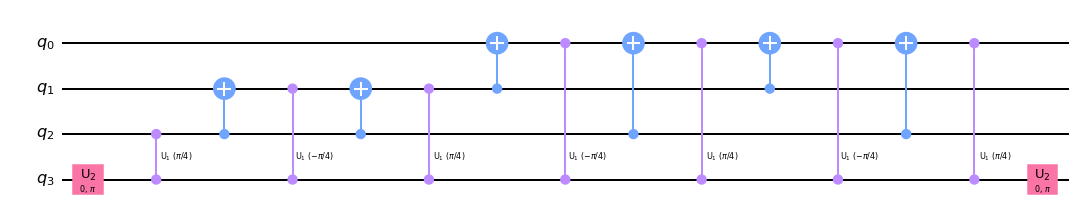

In [34]:
qc.decompose().decompose().draw('mpl')

In [35]:
num_qubits = 10
qc = QuantumCircuit(num_qubits)
qc.mcx(list(range(num_qubits-1)), num_qubits-1)
qc.draw()

q_0: ──■──
       │  
q_1: ──■──
       │  
q_2: ──■──
       │  
q_3: ──■──
       │  
q_4: ──■──
       │  
q_5: ──■──
       │  
q_6: ──■──
       │  
q_7: ──■──
       │  
q_8: ──■──
     ┌─┴─┐
q_9: ┤ X ├
     └───┘

In [36]:
qiskit.transpile(qc, basis_gates=['u3', 'cx']).count_ops()

OrderedDict([('u3', 1534), ('cx', 1532)])

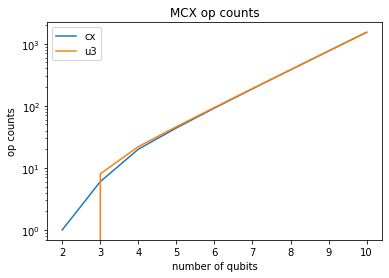

In [37]:
ns = np.arange(2, 11)

cx_counts = []
u3_counts = []

for n in ns:
    qc = QuantumCircuit(n)
    qc.mcx(list(range(n-1)), n-1)
    qcc = qiskit.transpile(qc, basis_gates=['u3', 'cx'])
    op_counts = qcc.count_ops()
    cx_counts.append(op_counts.get('cx', 0))
    u3_counts.append(op_counts.get('u3', 0))
    
plt.figure('mcx_op_counts')
plt.title('MCX op counts')
plt.semilogy(ns, cx_counts, label='cx')
plt.semilogy(ns, u3_counts, label='u3')
plt.legend()
plt.xlabel('number of qubits')
plt.ylabel('op counts');

## Version information

In [38]:
import qiskit.tools.jupyter
%qiskit_version_table